Kelompok 13
Janssen Mitchellano Hamaziah – 2602117525
Felix Juwono Purwoko - 2602160776
Louis - 2602147276

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy
from tensorflow import keras
import librosa
from matplotlib import pyplot

In [ ]:
#Ekstrak fitur
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  mfcc = numpy.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

Load File

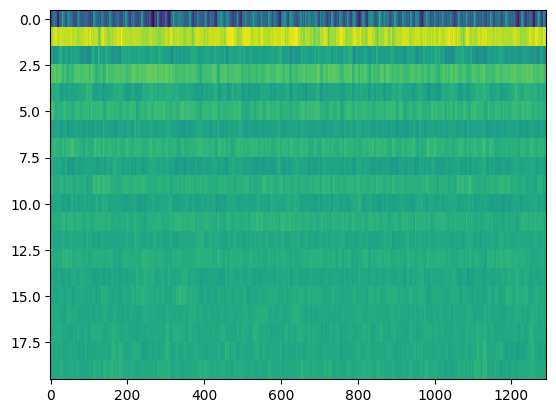

In [ ]:
example_file = "/content/drive/MyDrive/genres_original/blues/blues.00000.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

Feature Extraction

In [ ]:
def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  melspectrogram = numpy.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

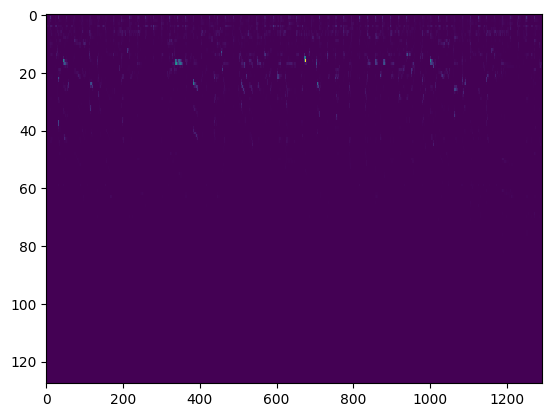

In [ ]:
melspectrogram = get_melspectrogram(example_file)
pyplot.imshow(melspectrogram, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = numpy.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

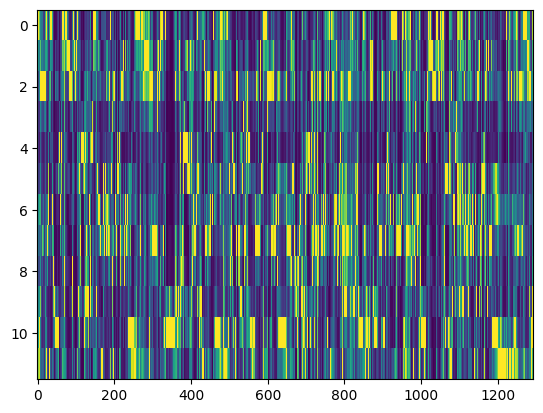

In [ ]:
chroma = get_chroma_vector(example_file)
pyplot.imshow(chroma, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = numpy.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

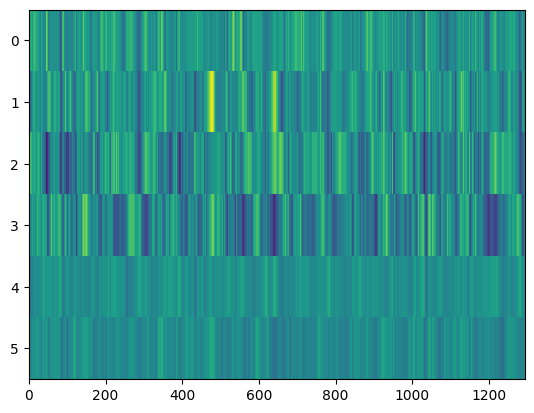

In [ ]:
tntz = get_tonnetz(example_file)
pyplot.imshow(tntz , interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_feature(file_path):
  # Extracting MFCC feature
  mfcc = get_mfcc(file_path)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = numpy.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # Extracting Mel Spectrogram feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = numpy.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

  # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)
  chroma_min = chroma.min(axis=1)
  chroma_max = chroma.max(axis=1)
  chroma_feature = numpy.concatenate( (chroma_mean, chroma_min, chroma_max) )

  # Extracting tonnetz feature
  tntz = get_tonnetz(file_path)
  tntz_mean = tntz.mean(axis=1)
  tntz_min = tntz.min(axis=1)
  tntz_max = tntz.max(axis=1)
  tntz_feature = numpy.concatenate( (tntz_mean, tntz_min, tntz_max) )

  feature = numpy.concatenate( (chroma_feature, melspectrogram_feature, mfcc_feature, tntz_feature) )
  # print(f'Feature:{feature}')
  return feature

Load File

In [ ]:
directory = '/content/drive/MyDrive/genres_original'

genres = ['blues','classical','pop','reggae','rock','metal','country','disco','hiphop']
features = []
labels = []
for genre in genres:
    print("Calculating features for genre : " + genre)
    for file in os.listdir(directory+"/"+genre):
        file_path = directory+"/"+genre+"/"+file

        features.append(get_feature(file_path))
        label = genres.index(genre)
        labels.append(label)

Calculating features for genre : blues
Calculating features for genre : classical
Calculating features for genre : pop
Calculating features for genre : reggae
Calculating features for genre : rock
Calculating features for genre : metal
Calculating features for genre : country
Calculating features for genre : disco
Calculating features for genre : hiphop


Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming features and labels are already numpy arrays
features = numpy.array(features)
labels = numpy.array(labels)

# First split: train and temporary (for further splitting into val and test)
features_train, features_temp, labels_train, labels_temp = train_test_split(
    features, labels, test_size=0.4, stratify=labels, random_state=42)

# Second split: validation and test
features_val, features_test, labels_val, labels_test = train_test_split(
    features_temp, labels_temp, test_size=0.5, stratify=labels_temp, random_state=42)

print(f'Train shape: {features_train.shape}, {labels_train.shape}')
print(f'Validation shape: {features_val.shape}, {labels_val.shape}')
print(f'Test shape: {features_test.shape}, {labels_test.shape}')


Train shape: (540, 498), (540,)
Validation shape: (180, 498), (180,)
Test shape: (180, 498), (180,)


Standardisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaling =  StandardScaler()
features_train_stand = Scaling.fit_transform(features_train)
features_val_stand =  Scaling.fit_transform(features_val)
features_test_stand = Scaling.fit_transform(features_test)

In [ ]:
features_train_stand

array([[-0.73808307, -1.28053322, -0.0481225 , ..., -1.25757836,
        -1.1569578 , -1.0047708 ],
       [-0.16073645,  0.05420691,  0.1228679 , ..., -0.96438519,
        -0.80372135, -1.23699228],
       [-0.47574674,  0.34185645,  1.04694303, ...,  0.49941402,
         0.19519976,  0.20643101],
       ...,
       [-0.43466059, -0.13126096, -0.52454707, ..., -0.22430272,
         0.19245019, -0.69862615],
       [ 0.65731939, -0.10983527, -0.88742449, ...,  0.62096632,
         1.25337035,  0.7775736 ],
       [ 0.11156275,  0.56031831,  0.46320678, ..., -0.18041446,
        -0.27072165, -0.98770138]])

In [ ]:
features_val.shape

(180, 498)

In [ ]:
labels_train

array([7, 8, 0, 5, 7, 8, 7, 4, 4, 7, 1, 7, 1, 4, 3, 4, 0, 1, 6, 8, 3, 6,
       8, 0, 8, 2, 4, 0, 6, 3, 5, 4, 0, 7, 0, 2, 6, 3, 3, 6, 1, 3, 4, 5,
       3, 8, 3, 8, 5, 4, 6, 4, 8, 1, 7, 0, 7, 6, 3, 8, 8, 3, 1, 4, 4, 5,
       3, 4, 3, 5, 0, 0, 7, 6, 4, 3, 0, 1, 7, 8, 5, 6, 5, 1, 2, 1, 8, 2,
       1, 3, 1, 0, 0, 5, 2, 7, 4, 7, 6, 6, 2, 3, 1, 8, 3, 0, 6, 5, 3, 2,
       3, 6, 1, 3, 3, 1, 3, 7, 3, 6, 8, 4, 0, 5, 1, 5, 2, 6, 0, 3, 0, 3,
       0, 2, 5, 5, 7, 7, 2, 7, 0, 0, 1, 8, 3, 2, 2, 1, 5, 3, 1, 1, 7, 8,
       0, 4, 6, 8, 0, 7, 5, 4, 5, 0, 3, 7, 1, 0, 1, 6, 1, 7, 0, 5, 5, 0,
       6, 8, 8, 1, 5, 5, 4, 5, 4, 0, 1, 3, 8, 0, 4, 7, 1, 2, 1, 2, 4, 7,
       1, 0, 2, 3, 8, 4, 7, 7, 4, 0, 1, 3, 4, 1, 1, 7, 3, 7, 8, 8, 7, 3,
       0, 1, 3, 4, 6, 6, 0, 1, 4, 1, 2, 7, 8, 3, 4, 1, 6, 2, 2, 5, 8, 7,
       7, 4, 2, 1, 5, 5, 0, 2, 6, 4, 5, 2, 3, 1, 8, 8, 2, 7, 4, 0, 0, 2,
       2, 0, 3, 3, 7, 3, 5, 4, 3, 5, 6, 5, 4, 7, 0, 2, 5, 2, 5, 2, 8, 6,
       2, 5, 2, 5, 8, 4, 2, 0, 8, 6, 8, 8, 0, 4, 6,

In [ ]:
unique_labels, counts = numpy.unique(labels_train, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")


Label: 0, Count: 60
Label: 1, Count: 60
Label: 2, Count: 60
Label: 3, Count: 60
Label: 4, Count: 60
Label: 5, Count: 60
Label: 6, Count: 60
Label: 7, Count: 60
Label: 8, Count: 60


Multilayer Perceptron

In [ ]:
#Layers
inputs = keras.Input(shape=features_train_stand.shape[1], name="feature")
x = keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(len(numpy.unique(labels_train)), activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    # Optimizer
    optimizer=keras.optimizers.RMSprop(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
history=model.fit(x=features_train.tolist(),y=labels_train.tolist(),verbose=1,validation_data=(features_val.tolist() , labels_val.tolist()), epochs=64)

Epoch 1/64
17/17 [==============================] - 1s 45ms/step - loss: 108.6203 - sparse_categorical_accuracy: 0.2407 - val_loss: 107.9100 - val_sparse_categorical_accuracy: 0.2111
Epoch 2/64
17/17 [==============================] - 0s 9ms/step - loss: 34.0384 - sparse_categorical_accuracy: 0.4333 - val_loss: 46.3154 - val_sparse_categorical_accuracy: 0.3667
Epoch 3/64
17/17 [==============================] - 0s 9ms/step - loss: 22.2613 - sparse_categorical_accuracy: 0.4593 - val_loss: 33.8557 - val_sparse_categorical_accuracy: 0.3778
Epoch 4/64
17/17 [==============================] - 0s 9ms/step - loss: 16.5843 - sparse_categorical_accuracy: 0.5611 - val_loss: 34.5832 - val_sparse_categorical_accuracy: 0.3500
Epoch 5/64
17/17 [==============================] - 0s 8ms/step - loss: 11.3125 - sparse_categorical_accuracy: 0.6148 - val_loss: 21.9216 - val_sparse_categorical_accuracy: 0.4333
Epoch 6/64
17/17 [==============================] - 0s 9ms/step - loss: 6.4592 - sparse_categoric

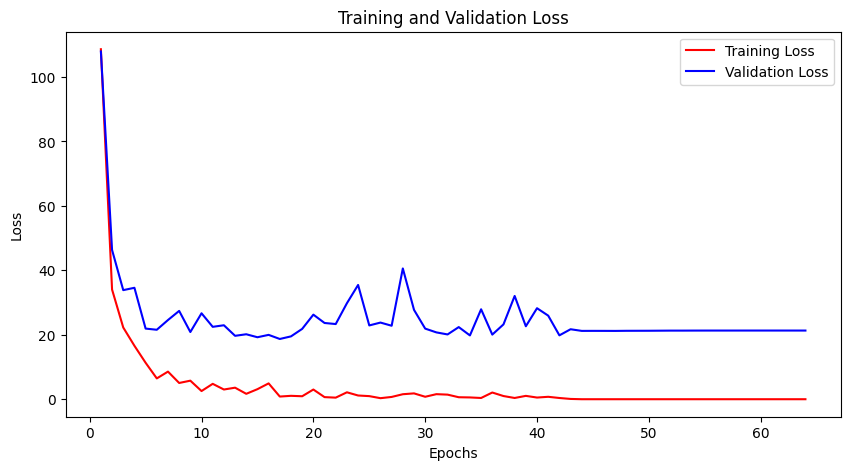

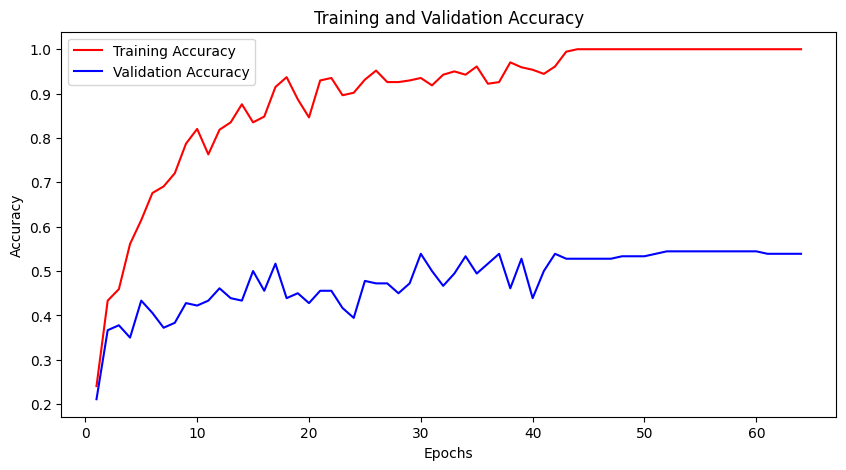

In [ ]:
import matplotlib.pyplot as plt

# = model.fit(x=features_train.tolist(), y=labels_train.tolist(), verbose=1, validation_data=(features_val.tolist(), labels_val.tolist()), epochs=17, callbacks=[early_stopping])

# Mendapatkan data loss dan akurasi dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
score = model.evaluate(x=features_test.tolist(),y=labels_test.tolist(), verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 58.888888359069824%


In [ ]:
# Membuat prediksi
y_pred_prob = model.predict(features_test.tolist())
y_pred = numpy.argmax(y_pred_prob, axis=1)

# Membuat laporan klasifikasi
report = classification_report(labels_test.tolist(), y_pred)
print(report)

6/6 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.95      0.90      0.92        20
           2       0.59      0.65      0.62        20
           3       0.58      0.55      0.56        20
           4       0.43      0.50      0.47        20
           5       0.62      0.65      0.63        20
           6       0.45      0.50      0.48        20
           7       0.55      0.55      0.55        20
           8       0.47      0.45      0.46        20

    accuracy                           0.59       180
   macro avg       0.60      0.59      0.59       180
weighted avg       0.60      0.59      0.59       180



SVM

In [ ]:
from sklearn.svm import SVC

# Menggunakan input dan output sebagai variabel
X_train = features_train_stand.tolist()
y_train = labels_train.tolist()
X_test = features_test_stand.tolist()
y_test = labels_test.tolist()

# Membuat model SVM
svm_model = SVC(kernel='rbf',C=100)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Menguji model
accuracy = svm_model.score(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")


Test Accuracy: 74.44444444444444 %


In [ ]:
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       1.00      0.95      0.97        20
           2       0.75      0.75      0.75        20
           3       0.76      0.80      0.78        20
           4       0.62      0.40      0.48        20
           5       0.74      0.85      0.79        20
           6       0.67      0.80      0.73        20
           7       0.68      0.65      0.67        20
           8       0.72      0.65      0.68        20

    accuracy                           0.74       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.74      0.74      0.74       180



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Menggunakan input dan output sebagai variabel
X_train = features_train.tolist()
y_train = labels_train.tolist()
X_test = features_test.tolist()
y_test = labels_test.tolist()

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# Melatih model Random Forest
rf_model.fit(X_train, y_train)

# Menguji model
accuracy = rf_model.score(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")


Test Accuracy: 72.22222222222221 %


In [ ]:
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       1.00      0.95      0.97        20
           2       0.81      0.85      0.83        20
           3       0.50      0.70      0.58        20
           4       0.56      0.50      0.53        20
           5       0.67      0.70      0.68        20
           6       0.68      0.75      0.71        20
           7       0.67      0.60      0.63        20
           8       0.87      0.65      0.74        20

    accuracy                           0.72       180
   macro avg       0.74      0.72      0.73       180
weighted avg       0.74      0.72      0.73       180



XG Boost

In [ ]:
from xgboost import XGBClassifier

# Menggunakan input dan output sebagai variabel
X_train = features_train.tolist()
y_train = labels_train.tolist()
X_test = features_test.tolist()
y_test = labels_test.tolist()

# Membuat model XGBoost
xgb_model = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.25, random_state=42)


# Melatih model XGBoost
xgb_model.fit(X_train, y_train)

# Menguji model
accuracy = xgb_model.score(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")


Test Accuracy: 75.0 %


In [ ]:
y_pred = xgb_model.predict(X_test)
#print classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       1.00      0.95      0.97        20
           2       0.69      0.90      0.78        20
           3       0.60      0.75      0.67        20
           4       0.62      0.65      0.63        20
           5       0.89      0.85      0.87        20
           6       0.79      0.55      0.65        20
           7       0.68      0.65      0.67        20
           8       0.80      0.60      0.69        20

    accuracy                           0.75       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.75      0.75       180

